<a href="https://colab.research.google.com/github/MuhamadIndra10/machine-learning/blob/main/Kelompok_3_Curse_of_dimensionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curse of dimensionality**

# `1. Darwin Dataset`

### Data Cleaning

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy import arange

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from scipy import stats
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####Load Dataset

In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/Dataset/"
#dataset darwin
df_dw = pd.read_csv(path +'Darwin/darwin.csv')

####Show top 10 Data

In [3]:
df_dw.head(10)

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P
5,id_6,1920,0.000011,199.764957,109.902254,1548,6260,0.212523,0.143013,154.833606,...,0.131135,0.018907,3.643543,1.667827,76,43790,1081.054579,152045.4446,74605,P
6,id_7,6415,0.000012,276.514601,279.725410,1837,13414,0.678487,0.193239,278.120005,...,0.139827,0.021473,4.408127,3.461721,131,42515,1927.908032,110278.7889,187490,P
7,id_8,1510,0.000007,284.015654,154.783882,2883,4663,0.668661,0.168026,219.399768,...,0.100256,0.024975,4.086628,3.047974,57,27660,1783.093999,183403.1459,40345,P
8,id_9,4860,0.000013,236.876312,308.575985,3171,7348,0.277021,0.214148,272.726149,...,0.043534,0.021311,3.926618,3.026629,102,64740,1253.154541,193816.2765,108925,P
9,id_10,6265,0.000013,381.928872,354.110090,5568,12313,1.279171,0.193084,368.019481,...,0.225087,0.019499,6.371888,3.659526,76,65600,1696.218826,169562.1039,166635,P


In [4]:
df_dw.shape

(174, 452)

In [5]:
df_dw.groupby('class').describe()

air_time1                                                            \
          count         mean           std    min     25%     50%     75%   
class                                                                       
H          85.0  4781.647059  11893.898351   65.0  1310.0  2130.0  3900.0   
P          89.0  6507.022472  13351.853628  440.0  2105.0  3490.0  5100.0   

                disp_index1            ... pressure_var25               \
            max       count      mean  ...            75%          max   
class                                  ...                               
H       96686.0        85.0  0.000009  ...    194188.1956  292377.2785   
P      109965.0        89.0  0.000010  ...    205015.1324  352981.8500   

      total_time25                                                           \
             count           mean            std      min      25%      50%   
class                                                                         
H             85.0  107617.294118  122665.303737  29980.0  49935.0  63130.0   
P             89.0  218246.168539  681960.371481  40345.0  59430.0  92150.0   

                            
            75%        max  
class                       
H       83445.0   657345.0  
P      159395.0  5704200.0  

[2 rows x 3600 columns]

In [6]:
df_dw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 452 entries, ID to class
dtypes: float64(300), int64(150), object(2)
memory usage: 614.6+ KB


#### Removing unneeded column

In [7]:
df_dw.drop('ID', axis=1, inplace=True)

In [8]:
df_dw.head(10)

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P
5,1920,0.000011,199.764957,109.902254,1548,6260,0.212523,0.143013,154.833606,0.028369,...,0.131135,0.018907,3.643543,1.667827,76,43790,1081.054579,152045.4446,74605,P
6,6415,0.000012,276.514601,279.725410,1837,13414,0.678487,0.193239,278.120005,0.121922,...,0.139827,0.021473,4.408127,3.461721,131,42515,1927.908032,110278.7889,187490,P
7,1510,0.000007,284.015654,154.783882,2883,4663,0.668661,0.168026,219.399768,0.123317,...,0.100256,0.024975,4.086628,3.047974,57,27660,1783.093999,183403.1459,40345,P
8,4860,0.000013,236.876312,308.575985,3171,7348,0.277021,0.214148,272.726149,0.040834,...,0.043534,0.021311,3.926618,3.026629,102,64740,1253.154541,193816.2765,108925,P
9,6265,0.000013,381.928872,354.110090,5568,12313,1.279171,0.193084,368.019481,0.234314,...,0.225087,0.019499,6.371888,3.659526,76,65600,1696.218826,169562.1039,166635,P


#### Identify Columns That Null Value and Remove Null Value

In [9]:
# Check for null values in the entire dataset
null_counts = df_dw.isnull().sum()

# Display columns with null values and their counts
print("Columns with null values:")
print(null_counts[null_counts > 0])

if len(null_counts[null_counts > 0]) != 0 :
  # Remove rows with any null values
  df_dw = df_dw.dropna()

Columns with null values:
Series([], dtype: int64)


 #### Identify Columns That Contain a Single Value

In [10]:
#checking for quasi constants
df_dw.nunique()

air_time1           165
disp_index1         131
gmrt_in_air1        174
gmrt_on_paper1      174
max_x_extension1    167
                   ... 
paper_time25        159
pressure_mean25     161
pressure_var25      161
total_time25        161
class                 2
Length: 451, dtype: int64

 #### Delete Columns That Contain a Single Value

In [11]:
print(df_dw.shape)
# get number of unique values for each column
counts = df_dw.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(df_dw.columns[to_del])
# drop useless columns
df_dw.drop(to_del, axis=1, inplace=True)
print(df_dw.shape)

(174, 451)
Index([], dtype='object')
(174, 451)


#### Identify Rows That Contain Duplicate Data and Delete Rows

In [12]:
# calculate duplicates
dups = df_dw.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df_dw[dups])
if dups.any() == True:
  df_dw.drop_duplicates(inplace=True)
  print(df_dw.shape)


False
Empty DataFrame
Columns: [air_time1, disp_index1, gmrt_in_air1, gmrt_on_paper1, max_x_extension1, max_y_extension1, mean_acc_in_air1, mean_acc_on_paper1, mean_gmrt1, mean_jerk_in_air1, mean_jerk_on_paper1, mean_speed_in_air1, mean_speed_on_paper1, num_of_pendown1, paper_time1, pressure_mean1, pressure_var1, total_time1, air_time2, disp_index2, gmrt_in_air2, gmrt_on_paper2, max_x_extension2, max_y_extension2, mean_acc_in_air2, mean_acc_on_paper2, mean_gmrt2, mean_jerk_in_air2, mean_jerk_on_paper2, mean_speed_in_air2, mean_speed_on_paper2, num_of_pendown2, paper_time2, pressure_mean2, pressure_var2, total_time2, air_time3, disp_index3, gmrt_in_air3, gmrt_on_paper3, max_x_extension3, max_y_extension3, mean_acc_in_air3, mean_acc_on_paper3, mean_gmrt3, mean_jerk_in_air3, mean_jerk_on_paper3, mean_speed_in_air3, mean_speed_on_paper3, num_of_pendown3, paper_time3, pressure_mean3, pressure_var3, total_time3, air_time4, disp_index4, gmrt_in_air4, gmrt_on_paper4, max_x_extension4, max_y_ex

####Consider Columns That Have Very Few Values

In [13]:
# summarize the number of unique values in each column
for i in range(df_dw.shape[1]):
  num = len(df_dw.iloc[:, i].unique())
  percentage = float(num) / df_dw.shape[0] * 100
  if percentage < 1:
    print('%d, %d, %.1f%%' % (i, num, percentage))

In [14]:
print(df_dw.shape)
# get number of unique values for each column
counts = df_dw.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df_dw.shape[0]*100) < 1]
print(df_dw.columns[to_del])
# drop useless columns
df_dw.drop(to_del, axis=1, inplace=True)
print(df_dw.shape)

(174, 451)
Index([], dtype='object')
(174, 451)


### Plot Histogram

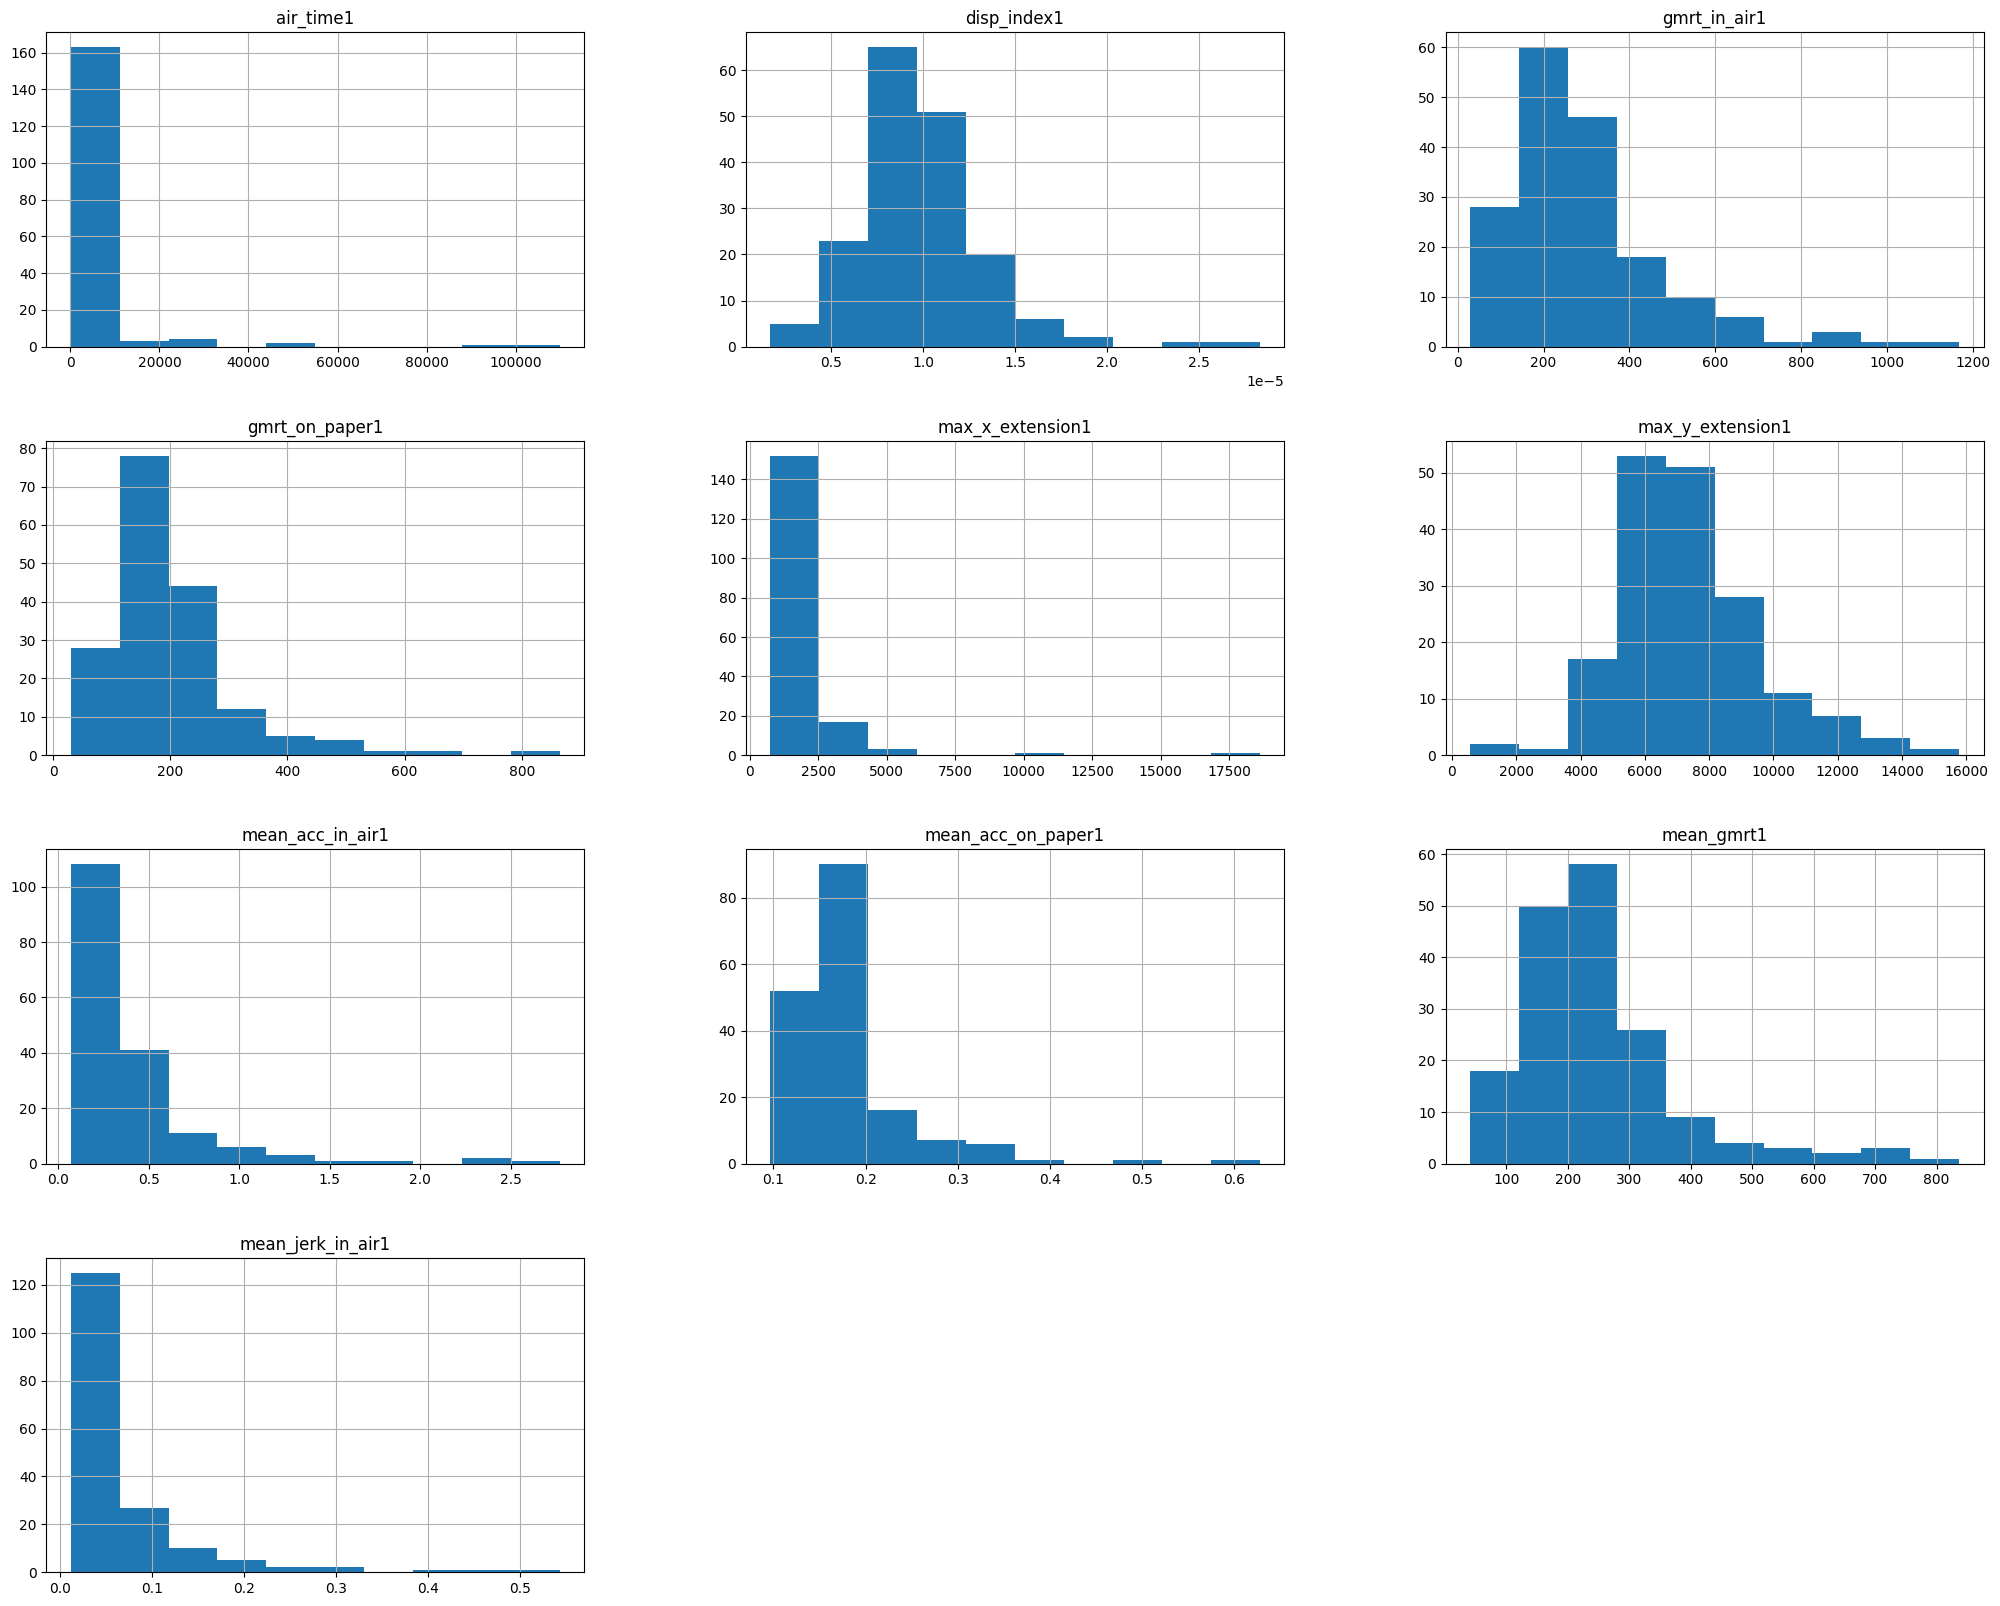

In [15]:
selected_columns = df_dw.iloc[:, :10]

# selected_columns = df_dw.iloc[:, :-2]
selected_columns.hist(bins=10, linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(25,20)
plt.show()

### Splitting The Data into Training And Testing Dataset

In [16]:
# retrieve numpy array
dataset = df_dw.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

# Normalisasi
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

###Feature Selection

In [17]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
k_best = 10  # Choose the number of top features to select

#### ANOVA F-test Features

Number of selected features univariate: 10
Selected features univariate : ['gmrt_in_air7', 'mean_gmrt7', 'mean_speed_in_air7', 'paper_time9', 'total_time9', 'total_time13', 'paper_time15', 'air_time16', 'disp_index22', 'disp_index23']


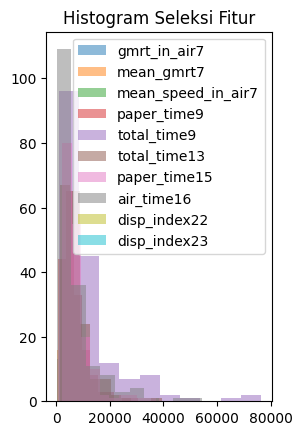

In [18]:
# Create SelectKBest object using chi2 as the score function
best_features_anova = SelectKBest(score_func=f_classif, k=k_best).fit(X_train, y_train)
selected_features_indices = best_features_anova.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_dw.columns[i] for i in selected_features_indices]

print(f"Number of selected features ANOVA: {len(selected_column_names)}")
print(f"Selected features ANOVA : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_dw[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [19]:
X_train_selected_anova = best_features_anova.transform(X_train)
X_test_selected_anova = best_features_anova.transform(X_test)

In [20]:
# Display the shape of the dataset before and after feature selection
print("Shape of original dataset:", X_train.shape)
print("Shape after feature selection:", X_train_selected_anova.shape)

Shape of original dataset: (139, 450)
Shape after feature selection: (139, 10)


In [21]:
df_dw.columns

Index(['air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1',
       'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1',
       'mean_acc_on_paper1', 'mean_gmrt1', 'mean_jerk_in_air1',
       ...
       'mean_jerk_in_air25', 'mean_jerk_on_paper25', 'mean_speed_in_air25',
       'mean_speed_on_paper25', 'num_of_pendown25', 'paper_time25',
       'pressure_mean25', 'pressure_var25', 'total_time25', 'class'],
      dtype='object', length=451)

#### Univariate Selection

Number of selected features univariate: 10
Selected features univariate : ['mean_gmrt7', 'paper_time7', 'num_of_pendown9', 'air_time13', 'air_time15', 'total_time15', 'air_time16', 'total_time16', 'air_time19', 'total_time19']


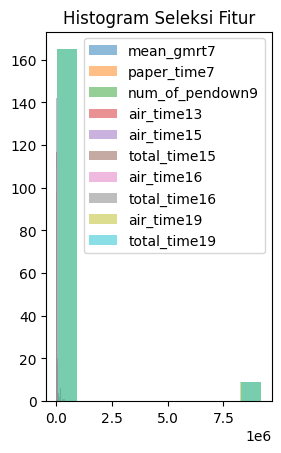

In [22]:
# Create SelectKBest object using chi2 as the score function
best_features_univariate = SelectKBest(score_func=chi2, k=k_best).fit(X_train, y_train)
selected_features_indices = best_features_univariate.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_dw.columns[i] for i in selected_features_indices]

print(f"Number of selected features univariate: {len(selected_column_names)}")
print(f"Selected features univariate : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_dw[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [23]:
X_train_selected_univariate = best_features_univariate.transform(X_train)
X_test_selected_univariate = best_features_univariate.transform(X_test)

#### Recursive Feature Elimination

Number of selected features RFE: 10
Selected features RFE : ['total_time6', 'mean_gmrt7', 'paper_time9', 'total_time9', 'total_time13', 'air_time15', 'total_time15', 'num_of_pendown19', 'pressure_var19', 'total_time22']


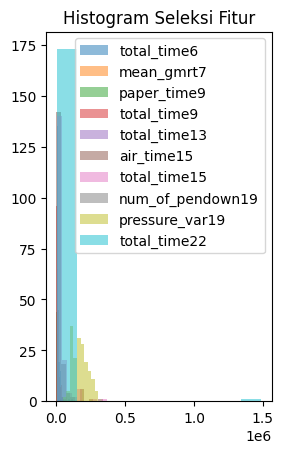

In [24]:
best_features_rfe = RFE(estimator=ExtraTreesClassifier(n_estimators=100), n_features_to_select=k_best)
best_features_rfe.fit(X_train, y_train)
selected_features_indices = best_features_rfe.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_dw.columns[i] for i in selected_features_indices]

print(f"Number of selected features RFE: {len(selected_column_names)}")
print(f"Selected features RFE : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_dw[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [25]:
X_train_selected_rfe = best_features_rfe.transform(X_train)
X_test_selected_rfe = best_features_rfe.transform(X_test)

### Dimensionality Reduction

In [26]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Principal Component Analysis - PCA

In [27]:
# Dimensionality Reduction with PCA for all feature
print("Dimensionality Reduction with PCA for all feature")
n_components = 5
pca = PCA(n_components=n_components)
X_train_reduced_pca = pca.fit_transform(X_train)
X_test_reduced_pca = pca.transform(X_test)

Dimensionality Reduction with PCA for all feature


#### Linear Discriminant Analysis - LDA

In [28]:
# Dimensionality Reduction with LDA for all feature
print("Dimensionality Reduction with LDA for all feature")
n_components = 1
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_reduced_lda = lda.fit_transform(X_train, y_train)
X_test_reduced_lda = lda.transform(X_test)

Dimensionality Reduction with LDA for all feature


### Uji metode tersebut dengan sedikitnya 5 Klasifikasi

In [29]:
# evaluation of a model using 4 features chosen with anova f-test
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # for checking the model accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import model_selection
# Define stratified k-fold cross-validation with 10 splits
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
scoring = 'accuracy'

####Logistic Regresion

In [30]:
# fit the model with all feature
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 88.57


In [31]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

Evaluate model with feature selection
Accuracy with feature selection ANOVA: 71.43
Accuracy with feature selection Univariate Selection: 80.00
Accuracy with feature selection Recursive Feature Elimination: 77.14


In [32]:
# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 500, 1000]  # Maximum number of iterations for optimization
}

In [33]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection ANOVA:", accuracy)

Best Hyperparameters with feature selection ANOVA: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score accuracy for Logistic Regression hyperparameter tuning with feature selection ANOVA: 82.86


In [34]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection Univariate:", accuracy)

Best Hyperparameters with feature selection Univariate: {'C': 0.001, 'max_iter': 500, 'penalty': 'none', 'solver': 'sag'}
Best score accuracy for Logistic Regression hyperparameter tuning with feature selection Univariate: 85.71


In [35]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection RFE:", accuracy)

Best Hyperparameters with feature selection RFE: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score accuracy for Logistic Regression hyperparameter tuning with feature selection RFE: 77.14


In [36]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction PCA:", accuracy)

Best Hyperparameters with feature reduction PCA: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction PCA: 85.71


In [37]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction LDA:", accuracy)

Best Hyperparameters with feature reduction LDA: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction LDA: 71.43


####Decision Tree

In [38]:
# fit the model with all feature
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 91.43


In [39]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

Evaluate model with feature selection
Accuracy with feature selection ANOVA: 77.14
Accuracy with feature selection Univariate Selection: 68.57
Accuracy with feature selection Recursive Feature Elimination: 71.43


In [40]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 10, 50, 100],
    'min_samples_leaf': [1, 5, 10, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [41]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection ANOVA:", accuracy)

Best Hyperparameters with feature selection ANOVA: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score accuracy for Decision Tree hyperparameter tuning with feature selection ANOVA: 57.14


In [42]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection Univariate:", accuracy)

Best Hyperparameters with feature selection Univariate: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score accuracy for Decision Tree hyperparameter tuning with feature selection Univariate: 80.0


In [43]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection RFE:", accuracy)

Best Hyperparameters with feature selection RFE: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score accuracy for Decision Tree hyperparameter tuning with feature selection RFE: 82.86


In [44]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature reduction PCA:", accuracy)

Best Hyperparameters with feature reduction PCA: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score accuracy for Decision Tree hyperparameter tuning with feature reduction PCA: 82.86


In [45]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature reduction LDA:", accuracy)

Best Hyperparameters with feature reduction LDA: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score accuracy for Decision Tree hyperparameter tuning with feature reduction LDA: 71.43


####Support Vector Machine

In [46]:
# fit the model with all feature
model = SVC()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 85.71


In [47]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

Evaluate model with feature selection
Accuracy with feature selection ANOVA: 77.14
Accuracy with feature selection Univariate Selection: 85.71
Accuracy with feature selection Recursive Feature Elimination: 85.71


In [48]:
# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3],
    'gamma': [0.1, 1, 'auto'],
    'class_weight': [None, 'balanced']
}

In [49]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection ANOVA:", accuracy)

Best Hyperparameters with feature selection ANOVA: {'C': 10, 'class_weight': None, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection ANOVA: 77.14


In [50]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection Univariate:", accuracy)

Best Hyperparameters with feature selection Univariate: {'C': 10, 'class_weight': None, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection Univariate: 82.86


In [51]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection RFE:", accuracy)

Best Hyperparameters with feature selection RFE: {'C': 10, 'class_weight': None, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection RFE: 85.71


In [52]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction PCA:", accuracy)

Best Hyperparameters with feature reduction PCA: {'C': 1, 'class_weight': None, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction PCA: 88.57


In [53]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction LDA:", accuracy)

Best Hyperparameters with feature reduction LDA: {'C': 0.1, 'class_weight': None, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction LDA: 71.43


####K-Nearest Neighbors

In [54]:
# fit the model with all feature
model = KNeighborsClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 65.71


In [55]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

Evaluate model with feature selection
Accuracy with feature selection ANOVA: 74.29
Accuracy with feature selection Univariate Selection: 77.14
Accuracy with feature selection Recursive Feature Elimination: 74.29


In [56]:
# Define hyperparameter grid for KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [10, 20, 30, 40]
}

In [57]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection ANOVA:", accuracy)

Best Hyperparameters with feature selection ANOVA: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection ANOVA: 74.29


In [58]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection Univariate:", accuracy)

Best Hyperparameters with feature selection Univariate: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection Univariate: 77.14


In [59]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection RFE:", accuracy)

Best Hyperparameters with feature selection RFE: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection RFE: 71.43


In [60]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction PCA:", accuracy)

Best Hyperparameters with feature reduction PCA: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction PCA: 88.57


In [61]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction LDA:", accuracy)

Best Hyperparameters with feature reduction LDA: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction LDA: 71.43


####Random Forest

In [62]:
# fit the model with all feature
model = RandomForestClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 88.57


In [63]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

Evaluate model with feature selection
Accuracy with feature selection ANOVA: 82.86
Accuracy with feature selection Univariate Selection: 85.71
Accuracy with feature selection Recursive Feature Elimination: 85.71


In [64]:
# Define hyperparameter grid for KNeighborsClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [65]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection ANOVA:", accuracy)

Best Hyperparameters with feature selection ANOVA: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score accuracy for Random Forest hyperparameter tuning with feature selection ANOVA: 85.71


In [66]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection Univariate:", accuracy)

Best Hyperparameters with feature selection Univariate: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best score accuracy for Random Forest hyperparameter tuning with feature selection Univariate: 80.0


In [67]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection RFE:", accuracy)

Best Hyperparameters with feature selection RFE: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best score accuracy for Random Forest hyperparameter tuning with feature selection RFE: 82.86


In [68]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature reduction PCA:", accuracy)

Best Hyperparameters with feature reduction PCA: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score accuracy for Random Forest hyperparameter tuning with feature reduction PCA: 88.57


In [69]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature reduction LDA:", accuracy)

Best Hyperparameters with feature reduction LDA: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score accuracy for Random Forest hyperparameter tuning with feature reduction LDA: 71.43


# `2. Toxicity Dataset`

### Data Cleaning

In [85]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy import arange

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Load Dataset

In [86]:
path = "/content/drive/MyDrive/Colab Notebooks/Dataset/"
df_tc = pd.read_csv(path +'Toxicity/toxicity.csv')

####Show top 10 Data

In [87]:
df_tc.head(10)

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,0.0908,0,0.0075,0.0173,0,0.0000,-0.0436,0.0409,0.0000,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,NonToxic
1,0.0213,0,0.1144,-0.0410,0,0.0000,0.1231,-0.0316,0.0000,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,NonToxic
2,0.0018,0,-0.0156,-0.0765,2,0.0000,-0.1138,-0.1791,0.0000,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,NonToxic
3,-0.0251,0,-0.0064,-0.0894,3,0.0000,-0.0747,-0.1151,0.0000,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,NonToxic
4,0.0135,0,0.0424,-0.0353,0,0.0000,-0.0638,0.0307,0.0000,0.0306,...,12.3240,19.7486,0.1789,1.4495,0.0120,2,0.0,-0.1071,0.00,NonToxic
5,-0.0028,2,-0.0164,-0.0912,2,0.0000,-0.0356,-0.0159,6.0139,0.0922,...,15.6022,6.2113,0.1755,1.4774,0.0133,0,0.0,-0.0980,0.00,NonToxic
6,-0.0094,0,0.0132,-0.1035,0,0.0000,-0.0046,-0.0870,0.0000,0.1063,...,13.0472,7.0536,0.1785,1.4507,0.0113,2,0.0,-0.0824,0.00,NonToxic
7,0.0081,0,0.1350,-0.0399,0,0.0000,0.0490,0.1199,0.0000,0.0782,...,5.8514,9.7255,0.1834,1.2707,0.0051,1,0.0,-0.0498,0.00,NonToxic
8,-0.0619,0,-0.0042,-0.1371,1,5.6998,-0.0332,-0.1463,0.0000,0.0414,...,11.4702,6.2490,0.1651,1.2517,0.0079,1,0.0,-0.0830,0.25,NonToxic
9,-0.0170,0,-0.1268,0.0011,1,0.0000,-0.0957,-0.2394,0.0000,-0.0770,...,12.8973,10.2835,0.2057,1.2290,0.0138,2,0.0,-0.1054,0.00,NonToxic


In [88]:
df_tc.shape

(171, 1204)

In [89]:
df_tc.groupby('Class').describe()

MATS3v                                                          \
          count      mean       std     min       25%      50%      75%   
Class                                                                     
NonToxic  115.0 -0.026903  0.062919 -0.3115 -0.060300 -0.02130  0.00650   
Toxic      56.0 -0.040159  0.064502 -0.2369 -0.073225 -0.04145 -0.00515   

                 nHBint10            ... ETA_dEpsilon_C         MDEO-22  \
             max    count      mean  ...            75%     max   count   
Class                                ...                                  
NonToxic  0.1411    115.0  0.313043  ...        -0.0678 -0.0073   115.0   
Toxic     0.1043     56.0  0.321429  ...        -0.0652 -0.0424    56.0   

                                                          
              mean       std  min  25%  50%  75%     max  
Class                                                     
NonToxic  0.050783  0.149332  0.0  0.0  0.0  0.0  0.8622  
Toxic     0.084127  0.365893  0.0  0.0  0.0  0.0  2.6361  

[2 rows x 9624 columns]

In [90]:
df_tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 1204 entries, MATS3v to Class
dtypes: float64(1003), int64(200), object(1)
memory usage: 1.6+ MB


#### Identify Columns That Null Value and Remove Null Value

In [91]:
# Check for null values in the entire dataset
null_counts = df_tc.isnull().sum()

# Display columns with null values and their counts
print("Columns with null values:")
print(null_counts[null_counts > 0])

if len(null_counts[null_counts > 0]) != 0 :
  # Remove rows with any null values
  df_tc = df_tc.dropna()

Columns with null values:
Series([], dtype: int64)


 #### Identify Columns That Contain a Single Value

In [92]:
#checking for quasi constants
df_tc.nunique()

MATS3v             163
nHBint10             4
MATS3s             168
MATS3p             157
nHBDon_Lipinski      7
                  ... 
nT5Ring              6
SHdNH                3
ETA_dEpsilon_C     156
MDEO-22             18
Class                2
Length: 1204, dtype: int64

 #### Delete Columns That Contain a Single Value

In [93]:
print(df_tc.shape)
# get number of unique values for each column
counts = df_tc.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(df_tc.columns[to_del])
# drop useless columns
df_tc.drop(to_del, axis=1, inplace=True)
print(df_tc.shape)

(171, 1204)
Index([], dtype='object')
(171, 1204)


#### Identify Rows That Contain Duplicate Data and Delete Rows

In [94]:
# calculate duplicates
dups = df_tc.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df_tc[dups])
if dups.any() == True:
  df_tc.drop_duplicates(inplace=True)
  print(df_tc.shape)


False
Empty DataFrame
Columns: [MATS3v, nHBint10, MATS3s, MATS3p, nHBDon_Lipinski, minHBint8, MATS3e, MATS3c, minHBint2, MATS3m, minHBint6, minHBint7, minHBint4, MATS3i, VR3_Dt, SpMax8_Bhi, SdsN, SpMax8_Bhm, SpMax8_Bhe, ECCEN, MDEC-14, SpMax8_Bhs, SpMax8_Bhp, SpMax8_Bhv, MDEC-11, MDEC-12, MDEC-13, VR2_Dt, BIC5, ATS7s, ATS7p, ATS7v, ATS7i, ATS7m, ATS7e, mintN, nHsNH2, khs.sssCH, minHBint3, maxdssC, nT6Ring, minHBint5, nF8Ring, minssCH2, SpMax_DzZ, ETA_EtaP, nHsOH, SpMin1_Bhe, maxHother, nHBAcc_Lipinski, StN, khs.aaS, khs.aaO, khs.aaN, Sare, SHAvin, SpMax3_Bhv, SpMax3_Bhp, SpMax3_Bhs, SpMax3_Bhe, SpMin6_Bhi, SpMax3_Bhm, SpMax3_Bhi, ETA_EtaP_F_L, mindCH2, AATSC2e, AATSC2c, AATSC2m, AATSC2i, nsBr, AATS5p, AATSC2v, AATSC2p, AATSC2s, VABC, maxdNH, khs.ddsN, RotBtFrac, ATS4e, ATS4m, nFRing, ATS4i, EE_DzZ, ATS4s, ATS4p, ETA_Alpha, khs.sssN, EE_Dzi, MAXDN, EE_Dzm, EE_Dze, EE_Dzs, EE_Dzp, EE_Dzv, ATS8e, maxsOH, minssssNp, maxsOm, MDEC-23, MDEC-22, ...]
Index: []

[0 rows x 1204 columns]


####Consider Columns That Have Very Few Values

In [95]:
# summarize the number of unique values in each column
for i in range(df_tc.shape[1]):
  num = len(df_tc.iloc[:, i].unique())
  percentage = float(num) / df_tc.shape[0] * 100
  if percentage < 1:
    print('%d, %d, %.1f%%' % (i, num, percentage))

In [96]:
print(df_tc.shape)
# get number of unique values for each column
counts = df_tc.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df_tc.shape[0]*100) < 1]
print(df_tc.columns[to_del])
# drop useless columns
df_tc.drop(to_del, axis=1, inplace=True)
print(df_tc.shape)

(171, 1204)
Index([], dtype='object')
(171, 1204)


### Plot Histogram

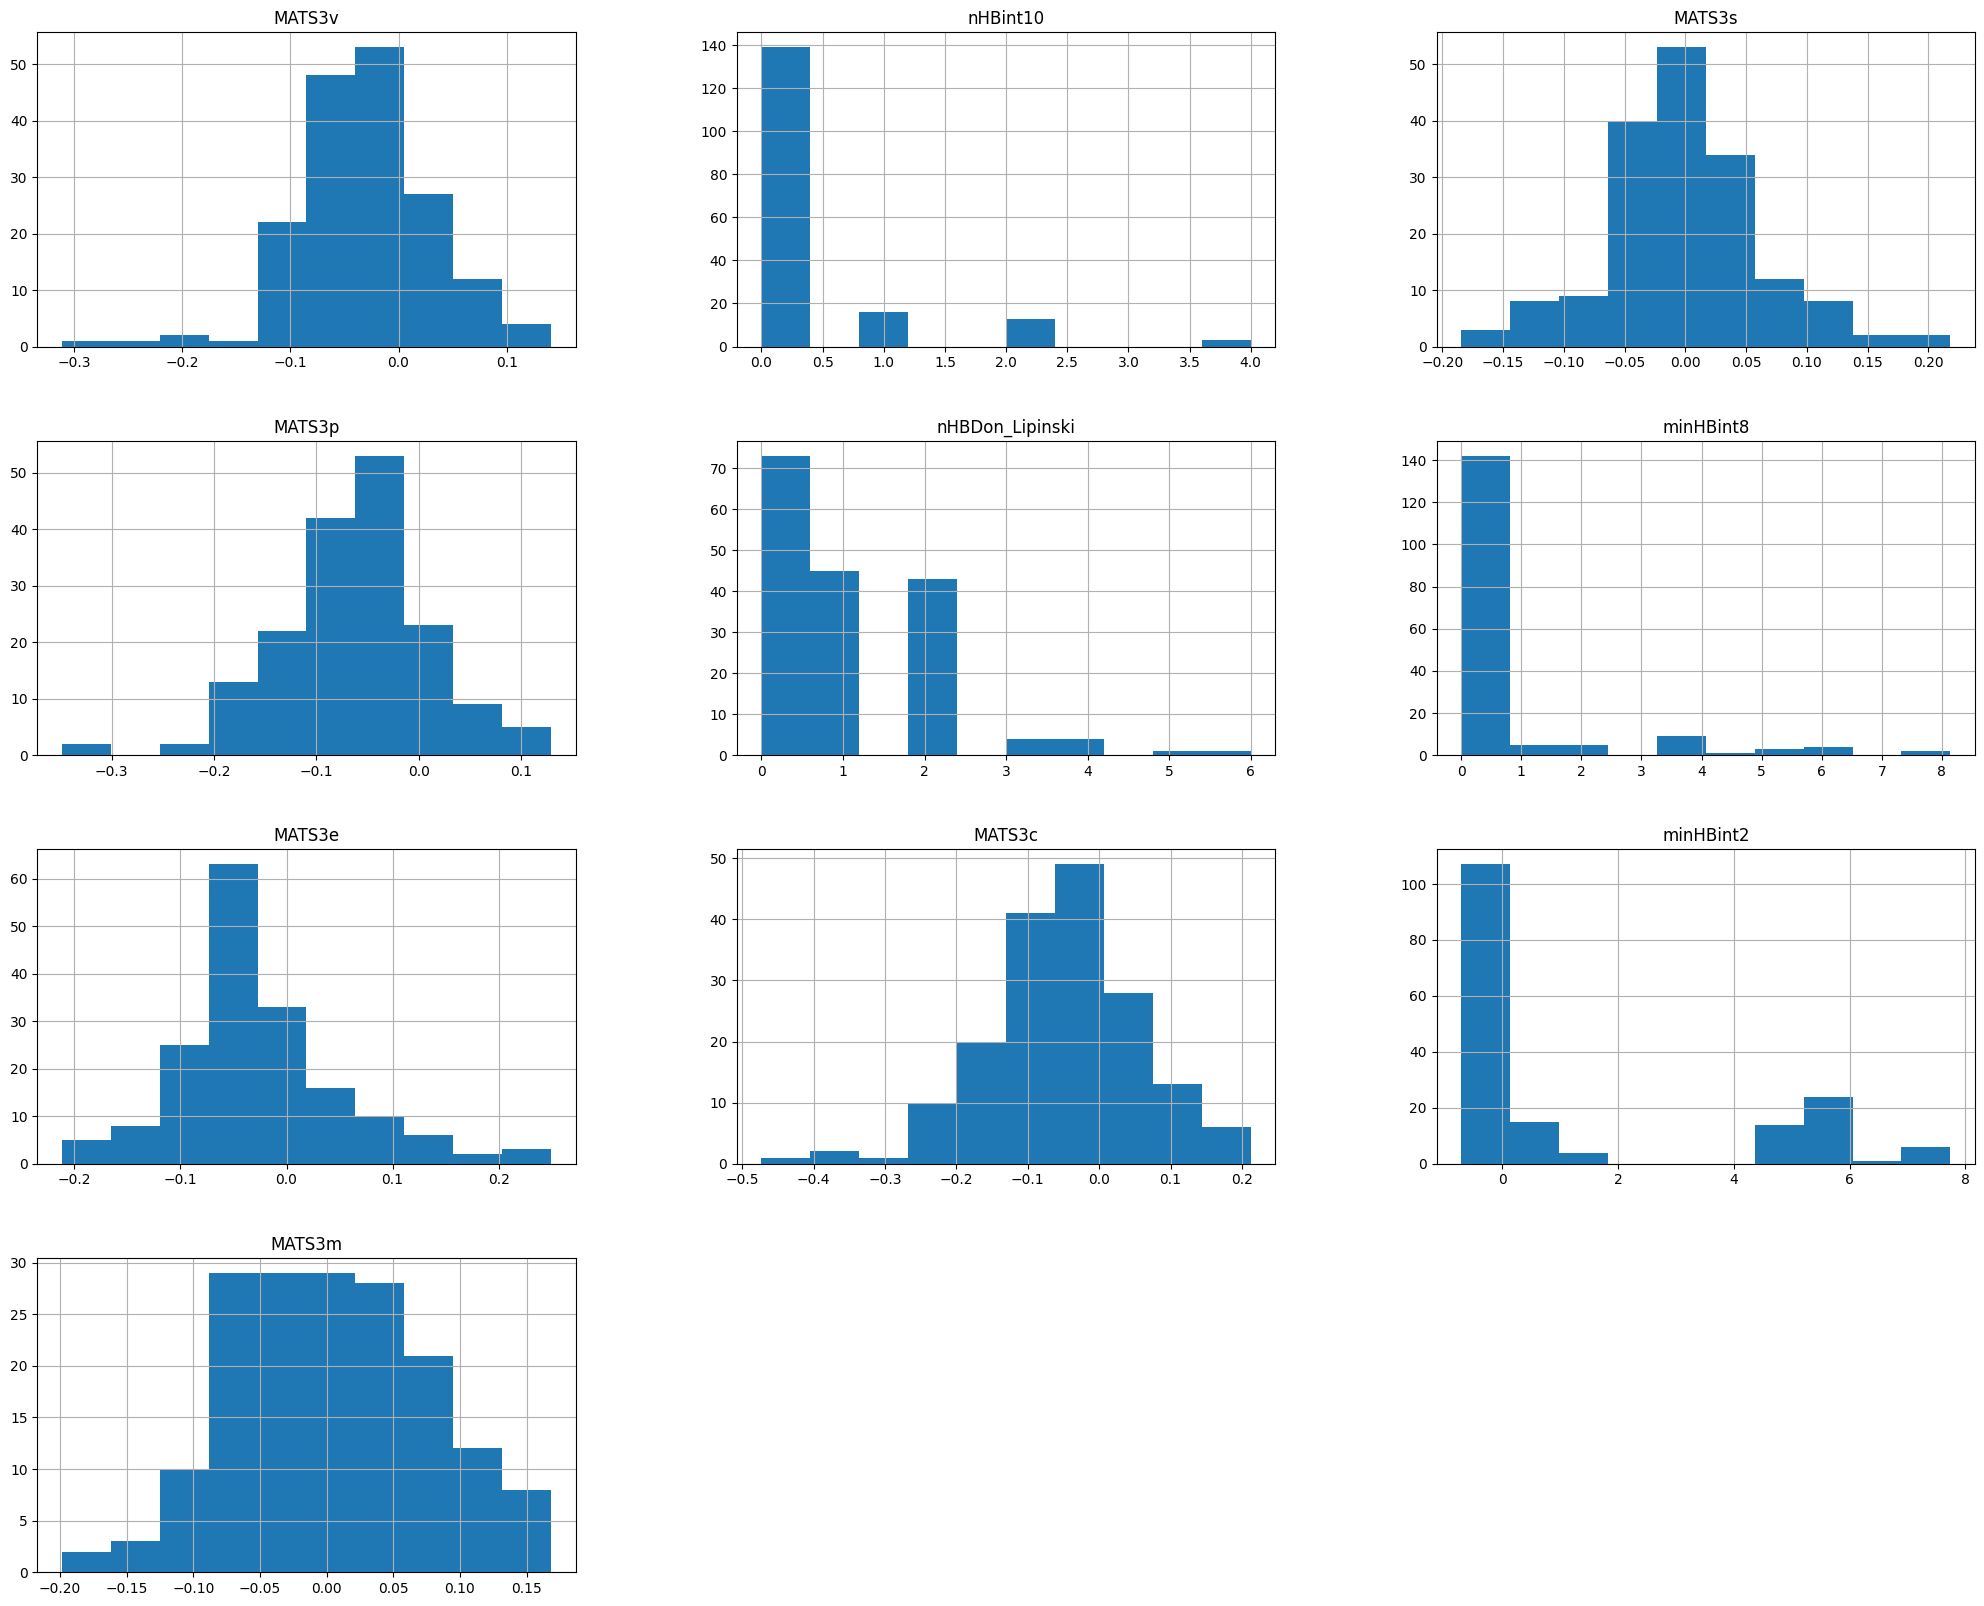

In [97]:
selected_columns = df_tc.iloc[:, :10]

# selected_columns = df_tc.iloc[:, :-2]
selected_columns.hist(bins=10, linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(25,20)
plt.show()

### Splitting The Data into Training And Testing Dataset

In [98]:
# retrieve numpy array
dataset = df_tc.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

# Normalisasi
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

###Feature Selection

In [99]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
k_best = 10  # Choose the number of top features to select

#### ANOVA F-test Features

Number of selected features ANOVA: 10
Selected features ANOVA : ['VR2_Dt', 'GATS1i', 'MATS7p', 'AATSC8i', 'nAcid', 'EE_Dt', 'C2SP2', 'VR1_Dt', 'MATS8i', 'AATSC7p']


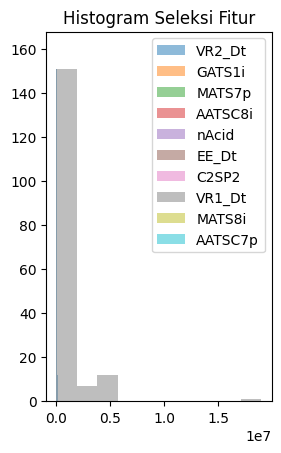

In [100]:
# Create SelectKBest object using chi2 as the score function
best_features_anova = SelectKBest(score_func=f_classif, k=k_best).fit(X_train, y_train)
selected_features_indices = best_features_anova.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_tc.columns[i] for i in selected_features_indices]

print(f"Number of selected features ANOVA: {len(selected_column_names)}")
print(f"Selected features ANOVA : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_tc[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [101]:
X_train_selected_anova = best_features_anova.transform(X_train)
X_test_selected_anova = best_features_anova.transform(X_test)

In [102]:
# Display the shape of the dataset before and after feature selection
print("Shape of original dataset:", X_train.shape)
print("Shape after feature selection:", X_train_selected_anova.shape)

Shape of original dataset: (136, 1203)
Shape after feature selection: (136, 10)


In [103]:
df_tc.columns

Index(['MATS3v', 'nHBint10', 'MATS3s', 'MATS3p', 'nHBDon_Lipinski',
       'minHBint8', 'MATS3e', 'MATS3c', 'minHBint2', 'MATS3m',
       ...
       'WTPT-4', 'WTPT-5', 'ETA_EtaP_L', 'ETA_EtaP_F', 'ETA_EtaP_B', 'nT5Ring',
       'SHdNH', 'ETA_dEpsilon_C', 'MDEO-22', 'Class'],
      dtype='object', length=1204)

#### Univariate Selection

Number of selected features univariate: 10
Selected features univariate : ['maxsOm', 'nHtCH', 'khs.tCH', 'minsOm', 'khs.sNH2', 'nsNH2', 'C2SP1', 'ntCH', 'mintCH', 'maxtCH']


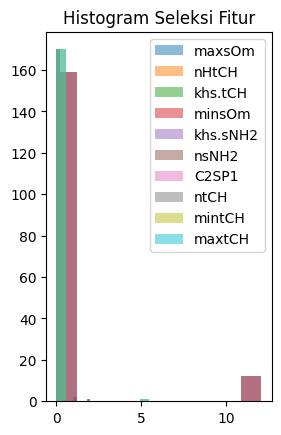

In [104]:
# Create SelectKBest object using chi2 as the score function
best_features_univariate = SelectKBest(score_func=chi2, k=k_best).fit(X_train, y_train)
selected_features_indices = best_features_univariate.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_tc.columns[i] for i in selected_features_indices]

print(f"Number of selected features univariate: {len(selected_column_names)}")
print(f"Selected features univariate : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_tc[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [105]:
X_train_selected_univariate = best_features_univariate.transform(X_train)
X_test_selected_univariate = best_features_univariate.transform(X_test)

#### Recursive Feature Elimination

Number of selected features RFE: 10
Selected features RFE : ['MATS3v', 'SpMax8_Bhv', 'MDEC-23', 'ATSC8i', 'MATS7i', 'ATSC1v', 'EE_Dt', 'MATS8i', 'ZMIC1', 'AATSC7p']


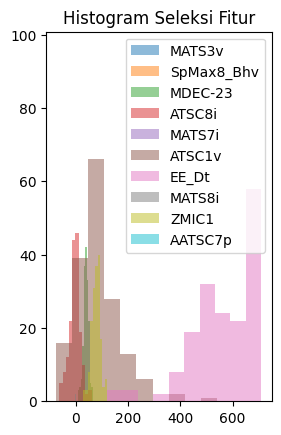

In [106]:
best_features_rfe = RFE(estimator=ExtraTreesClassifier(n_estimators=100), n_features_to_select=k_best)
best_features_rfe.fit(X_train, y_train)
selected_features_indices = best_features_rfe.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_tc.columns[i] for i in selected_features_indices]

print(f"Number of selected features RFE: {len(selected_column_names)}")
print(f"Selected features RFE : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_tc[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [107]:
X_train_selected_rfe = best_features_rfe.transform(X_train)
X_test_selected_rfe = best_features_rfe.transform(X_test)

### Dimensionality Reduction

In [108]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Principal Component Analysis - PCA

In [109]:
# Dimensionality Reduction with PCA for all feature
print("Dimensionality Reduction with PCA for all feature")
n_components = 5
pca = PCA(n_components=n_components)
X_train_reduced_pca = pca.fit_transform(X_train)
X_test_reduced_pca = pca.transform(X_test)

Dimensionality Reduction with PCA for all feature


#### Linear Discriminant Analysis - LDA

In [110]:
# Dimensionality Reduction with LDA for all feature
print("Dimensionality Reduction with LDA for all feature")
n_components = 1
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_reduced_lda = lda.fit_transform(X_train, y_train)
X_test_reduced_lda = lda.transform(X_test)

Dimensionality Reduction with LDA for all feature


### Uji metode tersebut dengan sedikitnya 5 Klasifikasi

In [111]:
# evaluation of a model using 4 features chosen with anova f-test
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # for checking the model accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import model_selection
# Define stratified k-fold cross-validation with 10 splits
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
scoring = 'accuracy'

####Logistic Regresion

In [112]:
# fit the model with all feature
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 54.29


In [113]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

Evaluate model with feature selection
Accuracy with feature selection ANOVA: 68.57
Accuracy with feature selection Univariate Selection: 68.57
Accuracy with feature selection Recursive Feature Elimination: 68.57


In [114]:
# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 500, 1000]  # Maximum number of iterations for optimization
}

In [115]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection ANOVA:", accuracy)

Best Hyperparameters with feature selection ANOVA: {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score accuracy for Logistic Regression hyperparameter tuning with feature selection ANOVA: 68.57


In [116]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection Univariate:", accuracy)

Best Hyperparameters with feature selection Univariate: {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score accuracy for Logistic Regression hyperparameter tuning with feature selection Univariate: 68.57


In [117]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection RFE:", accuracy)

Best Hyperparameters with feature selection RFE: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score accuracy for Logistic Regression hyperparameter tuning with feature selection RFE: 65.71


In [118]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction PCA:", accuracy)

Best Hyperparameters with feature reduction PCA: {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction PCA: 68.57


In [119]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction LDA:", accuracy)

Best Hyperparameters with feature reduction LDA: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction LDA: 51.43


####Decision Tree

In [120]:
# fit the model with all feature
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 42.86


In [121]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

Evaluate model with feature selection
Accuracy with feature selection ANOVA: 54.29
Accuracy with feature selection Univariate Selection: 68.57
Accuracy with feature selection Recursive Feature Elimination: 68.57


In [122]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 10, 50, 100],
    'min_samples_leaf': [1, 5, 10, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [123]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection ANOVA:", accuracy)

Best Hyperparameters with feature selection ANOVA: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score accuracy for Decision Tree hyperparameter tuning with feature selection ANOVA: 62.86


In [124]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection Univariate:", accuracy)

Best Hyperparameters with feature selection Univariate: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2}
Best score accuracy for Decision Tree hyperparameter tuning with feature selection Univariate: 68.57


In [125]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection RFE:", accuracy)

Best Hyperparameters with feature selection RFE: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 50}
Best score accuracy for Decision Tree hyperparameter tuning with feature selection RFE: 65.71


In [126]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature reduction PCA:", accuracy)

Best Hyperparameters with feature reduction PCA: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 100}
Best score accuracy for Decision Tree hyperparameter tuning with feature reduction PCA: 60.0


In [127]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature reduction LDA:", accuracy)

Best Hyperparameters with feature reduction LDA: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 100}
Best score accuracy for Decision Tree hyperparameter tuning with feature reduction LDA: 57.14


####Support Vector Machine

In [128]:
# fit the model with all feature
model = SVC()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 68.57


In [129]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

Evaluate model with feature selection
Accuracy with feature selection ANOVA: 68.57
Accuracy with feature selection Univariate Selection: 68.57
Accuracy with feature selection Recursive Feature Elimination: 65.71


In [130]:
# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3],
    'gamma': [0.1, 1, 'auto'],
    'class_weight': [None, 'balanced']
}

In [131]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection ANOVA:", accuracy)

Best Hyperparameters with feature selection ANOVA: {'C': 0.1, 'class_weight': None, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection ANOVA: 68.57


In [132]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection Univariate:", accuracy)

Best Hyperparameters with feature selection Univariate: {'C': 0.1, 'class_weight': None, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection Univariate: 68.57


In [133]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection RFE:", accuracy)

Best Hyperparameters with feature selection RFE: {'C': 10, 'class_weight': None, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection RFE: 57.14


In [134]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction PCA:", accuracy)

Best Hyperparameters with feature reduction PCA: {'C': 0.1, 'class_weight': None, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction PCA: 68.57


In [135]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction LDA:", accuracy)

Best Hyperparameters with feature reduction LDA: {'C': 0.1, 'class_weight': None, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction LDA: 57.14


####K-Nearest Neighbors

In [136]:
# fit the model with all feature
model = KNeighborsClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 65.71


In [137]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

Evaluate model with feature selection
Accuracy with feature selection ANOVA: 65.71
Accuracy with feature selection Univariate Selection: 68.57
Accuracy with feature selection Recursive Feature Elimination: 65.71


In [138]:
# Define hyperparameter grid for KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [10, 20, 30, 40]
}

In [139]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection ANOVA:", accuracy)

Best Hyperparameters with feature selection ANOVA: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection ANOVA: 68.57


In [140]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection Univariate:", accuracy)

Best Hyperparameters with feature selection Univariate: {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection Univariate: 62.86


In [141]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection RFE:", accuracy)

Best Hyperparameters with feature selection RFE: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection RFE: 68.57


In [142]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction PCA:", accuracy)

Best Hyperparameters with feature reduction PCA: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction PCA: 51.43


In [143]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction LDA:", accuracy)

Best Hyperparameters with feature reduction LDA: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction LDA: 57.14


####Random Forest

In [144]:
# fit the model with all feature
model = RandomForestClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 60.00


In [145]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

Evaluate model with feature selection
Accuracy with feature selection ANOVA: 57.14
Accuracy with feature selection Univariate Selection: 68.57
Accuracy with feature selection Recursive Feature Elimination: 65.71


In [146]:
# Define hyperparameter grid for KNeighborsClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [147]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection ANOVA:", accuracy)

Best Hyperparameters with feature selection ANOVA: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best score accuracy for Random Forest hyperparameter tuning with feature selection ANOVA: 60.0


In [148]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection Univariate:", accuracy)

Best Hyperparameters with feature selection Univariate: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best score accuracy for Random Forest hyperparameter tuning with feature selection Univariate: 68.57


In [149]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection RFE:", accuracy)

Best Hyperparameters with feature selection RFE: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best score accuracy for Random Forest hyperparameter tuning with feature selection RFE: 65.71


In [150]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature reduction PCA:", accuracy)

Best Hyperparameters with feature reduction PCA: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best score accuracy for Random Forest hyperparameter tuning with feature reduction PCA: 57.14


In [151]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature reduction LDA:", accuracy)

Best Hyperparameters with feature reduction LDA: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best score accuracy for Random Forest hyperparameter tuning with feature reduction LDA: 57.14


# `3. Gene Expression`

### Data Cleaning

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy import arange

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####Load Dataset

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Dataset/"
rna_exp = pd.read_csv(path +'Gene Expression/data.csv')
labels = pd.read_csv(path +'Gene Expression/labels.csv')

df_gene = pd.concat([rna_exp, labels], axis=1)

####Show top 10 Data

In [ ]:
df_gene.head(10)

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Unnamed: 0,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,sample_0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,sample_1,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,sample_2,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,sample_3,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,sample_4,BRCA
5,sample_5,0.0,3.467853,3.581918,6.620243,9.706829,0.0,7.758510,0.000000,0.0,...,9.928339,6.096154,9.816001,11.556995,9.244150,9.836473,5.355133,0.0,sample_5,PRAD
6,sample_6,0.0,1.224966,1.691177,6.572007,9.640511,0.0,6.754888,0.531868,0.0,...,9.673966,1.877744,9.802692,13.256060,9.664486,9.244219,8.330912,0.0,sample_6,KIRC
7,sample_7,0.0,2.854853,1.750478,7.226720,9.758691,0.0,5.952103,0.000000,0.0,...,9.599230,5.244290,9.994339,12.670377,9.987733,9.216872,6.551490,0.0,sample_7,PRAD
8,sample_8,0.0,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,0.0,...,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321,0.0,sample_8,BRCA
9,sample_9,0.0,3.642494,4.423558,6.849511,9.464466,0.0,7.947216,0.724214,0.0,...,10.259096,6.131583,9.923582,11.144295,9.244851,9.484299,4.759151,0.0,sample_9,PRAD


In [ ]:
df_gene.shape

(801, 20534)

In [ ]:
df_gene.groupby('Class').describe()

gene_0                                                   gene_1  \
       count      mean       std  min  25%  50%  75%       max  count   
Class                                                                   
BRCA   300.0  0.011362  0.102185  0.0  0.0  0.0  0.0  1.482332  300.0   
COAD    78.0  0.022212  0.112192  0.0  0.0  0.0  0.0  0.646439   78.0   
KIRC   146.0  0.046544  0.177961  0.0  0.0  0.0  0.0  1.241108  146.0   
LUAD   141.0  0.041088  0.167073  0.0  0.0  0.0  0.0  1.219153  141.0   
PRAD   136.0  0.026544  0.128584  0.0  0.0  0.0  0.0  0.873341  136.0   

                 ... gene_20529            gene_20530                      \
           mean  ...        75%        max      count      mean       std   
Class            ...                                                        
BRCA   2.839739  ...   8.102192  11.205836      300.0  0.073071  0.324911   
COAD   3.438381  ...   4.437802  10.867147       78.0  0.039924  0.159311   
KIRC   2.398129  ...   5.607134  10.168559      146.0  0.133671  0.513047   
LUAD   3.358260  ...   6.617225  10.659612      141.0  0.191586  0.461715   
PRAD   3.441041  ...   7.012946   9.632608      136.0  0.035729  0.132844   

                                     
       min  25%  50%  75%       max  
Class                                
BRCA   0.0  0.0  0.0  0.0  4.180896  
COAD   0.0  0.0  0.0  0.0  0.932288  
KIRC   0.0  0.0  0.0  0.0  5.254133  
LUAD   0.0  0.0  0.0  0.0  3.848728  
PRAD   0.0  0.0  0.0  0.0  0.717824  

[5 rows x 164248 columns]

In [ ]:
df_gene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20534 entries, Unnamed: 0 to Class
dtypes: float64(20531), object(3)
memory usage: 125.5+ MB


#### Removing unneeded column

In [ ]:
df_gene.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_gene.head(10)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.000000,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.000000,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.000000,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.000000,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.000000,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA
5,0.0,3.467853,3.581918,6.620243,9.706829,0.0,7.758510,0.000000,0.0,0.000000,...,8.602588,9.928339,6.096154,9.816001,11.556995,9.244150,9.836473,5.355133,0.0,PRAD
6,0.0,1.224966,1.691177,6.572007,9.640511,0.0,6.754888,0.531868,0.0,0.000000,...,7.927968,9.673966,1.877744,9.802692,13.256060,9.664486,9.244219,8.330912,0.0,KIRC
7,0.0,2.854853,1.750478,7.226720,9.758691,0.0,5.952103,0.000000,0.0,0.000000,...,8.277092,9.599230,5.244290,9.994339,12.670377,9.987733,9.216872,6.551490,0.0,PRAD
8,0.0,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,0.0,4.067604,...,9.597533,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321,0.0,BRCA
9,0.0,3.642494,4.423558,6.849511,9.464466,0.0,7.947216,0.724214,0.0,0.000000,...,8.712809,10.259096,6.131583,9.923582,11.144295,9.244851,9.484299,4.759151,0.0,PRAD


#### Identify Columns That Null Value and Remove Null Value

In [ ]:
# Check for null values in the entire dataset
null_counts = df_gene.isnull().sum()

# Display columns with null values and their counts
print("Columns with null values:")
print(null_counts[null_counts > 0])

if len(null_counts[null_counts > 0]) != 0 :
  # Remove rows with any null values
  df_gene = df_gene.dropna()

Columns with null values:
Series([], dtype: int64)


 #### Identify Columns That Contain a Single Value

In [ ]:
#checking for quasi constants
df_gene.nunique()

gene_0         36
gene_1        770
gene_2        793
gene_3        800
gene_4        799
             ... 
gene_20527    801
gene_20528    800
gene_20529    800
gene_20530     99
Class           5
Length: 20532, dtype: int64

 #### Delete Columns That Contain a Single Value

In [ ]:
print(df_gene.shape)
# get number of unique values for each column
counts = df_gene.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(df_gene.columns[to_del])
# drop useless columns
df_gene.drop(df_gene.columns[to_del], axis=1, inplace=True)
print(df_gene.shape)

(801, 20532)
Index(['gene_5', 'gene_23', 'gene_4370', 'gene_4808', 'gene_4809', 'gene_4814',
       'gene_4816', 'gene_4817', 'gene_4831', 'gene_5288',
       ...
       'gene_18908', 'gene_18909', 'gene_18910', 'gene_18911', 'gene_18914',
       'gene_18915', 'gene_19450', 'gene_19451', 'gene_19452', 'gene_19671'],
      dtype='object', length=267)
(801, 20265)


#### Identify Rows That Contain Duplicate Data and Delete Rows

In [ ]:
# calculate duplicates
dups = df_gene.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df_gene[dups])
if dups.any() == True:
  df_gene.drop_duplicates(inplace=True)
  print(df_gene.shape)


False
Empty DataFrame
Columns: [gene_0, gene_1, gene_2, gene_3, gene_4, gene_6, gene_7, gene_8, gene_9, gene_10, gene_11, gene_12, gene_13, gene_14, gene_15, gene_16, gene_17, gene_18, gene_19, gene_20, gene_21, gene_22, gene_24, gene_25, gene_26, gene_27, gene_28, gene_29, gene_30, gene_31, gene_32, gene_33, gene_34, gene_35, gene_36, gene_37, gene_38, gene_39, gene_40, gene_41, gene_42, gene_43, gene_44, gene_45, gene_46, gene_47, gene_48, gene_49, gene_50, gene_51, gene_52, gene_53, gene_54, gene_55, gene_56, gene_57, gene_58, gene_59, gene_60, gene_61, gene_62, gene_63, gene_64, gene_65, gene_66, gene_67, gene_68, gene_69, gene_70, gene_71, gene_72, gene_73, gene_74, gene_75, gene_76, gene_77, gene_78, gene_79, gene_80, gene_81, gene_82, gene_83, gene_84, gene_85, gene_86, gene_87, gene_88, gene_89, gene_90, gene_91, gene_92, gene_93, gene_94, gene_95, gene_96, gene_97, gene_98, gene_99, gene_100, gene_101, ...]
Index: []

[0 rows x 20265 columns]


####Consider Columns That Have Very Few Values

In [ ]:
# summarize the number of unique values in each column
for i in range(df_gene.shape[1]):
  num = len(df_gene.iloc[:, i].unique())
  percentage = float(num) / df_gene.shape[0] * 100
  if percentage < 1:
    print('%d, %d, %.1f%%' % (i, num, percentage))

8, 5, 0.6%
14, 8, 1.0%
15, 6, 0.7%
1622, 4, 0.5%
1747, 3, 0.4%
1763, 3, 0.4%
1842, 7, 0.9%
3525, 2, 0.2%
4316, 5, 0.6%
4331, 5, 0.6%
4368, 2, 0.2%
4369, 4, 0.5%
4371, 5, 0.6%
4372, 2, 0.2%
4373, 2, 0.2%
4636, 6, 0.7%
4804, 3, 0.4%
4805, 3, 0.4%
4806, 8, 1.0%
4809, 2, 0.2%
4810, 4, 0.5%
4811, 2, 0.2%
4814, 4, 0.5%
4815, 2, 0.2%
4816, 7, 0.9%
4820, 2, 0.2%
4821, 3, 0.4%
4825, 3, 0.4%
6041, 5, 0.6%
6051, 7, 0.9%
6181, 7, 0.9%
6794, 4, 0.5%
7182, 8, 1.0%
7252, 4, 0.5%
7463, 3, 0.4%
7960, 7, 0.9%
9274, 5, 0.6%
9279, 7, 0.9%
9280, 6, 0.7%
9283, 6, 0.7%
9285, 6, 0.7%
9289, 7, 0.9%
9290, 4, 0.5%
9291, 2, 0.2%
9295, 4, 0.5%
9296, 7, 0.9%
9298, 5, 0.6%
9300, 2, 0.2%
9302, 2, 0.2%
9314, 6, 0.7%
9329, 2, 0.2%
9330, 3, 0.4%
9337, 8, 1.0%
9420, 6, 0.7%
9431, 4, 0.5%
9434, 4, 0.5%
9448, 5, 0.6%
9501, 8, 1.0%
9722, 2, 0.2%
9755, 8, 1.0%
10116, 3, 0.4%
11107, 2, 0.2%
11207, 5, 0.6%
12034, 5, 0.6%
12336, 8, 1.0%
12339, 5, 0.6%
12348, 6, 0.7%
12349, 5, 0.6%
12359, 8, 1.0%
12360, 8, 1.0%
12363, 4, 0.5%
12

In [ ]:
print(df_gene.shape)
# get number of unique values for each column
counts = df_gene.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df_gene.shape[0]*100) < 1]
print(df_gene.columns[to_del])
# drop useless columns
df_gene.drop(df_gene.columns[to_del], axis=1, inplace=True)
print(df_gene.shape)

(801, 20265)
Index(['gene_9', 'gene_15', 'gene_16', 'gene_1624', 'gene_1749', 'gene_1765',
       'gene_1844', 'gene_3527', 'gene_4318', 'gene_4333',
       ...
       'gene_18814', 'gene_18816', 'gene_18817', 'gene_18904', 'gene_18913',
       'gene_18916', 'gene_18918', 'gene_18924', 'gene_18992', 'Class'],
      dtype='object', length=176)
(801, 20089)


### Plot Histogram

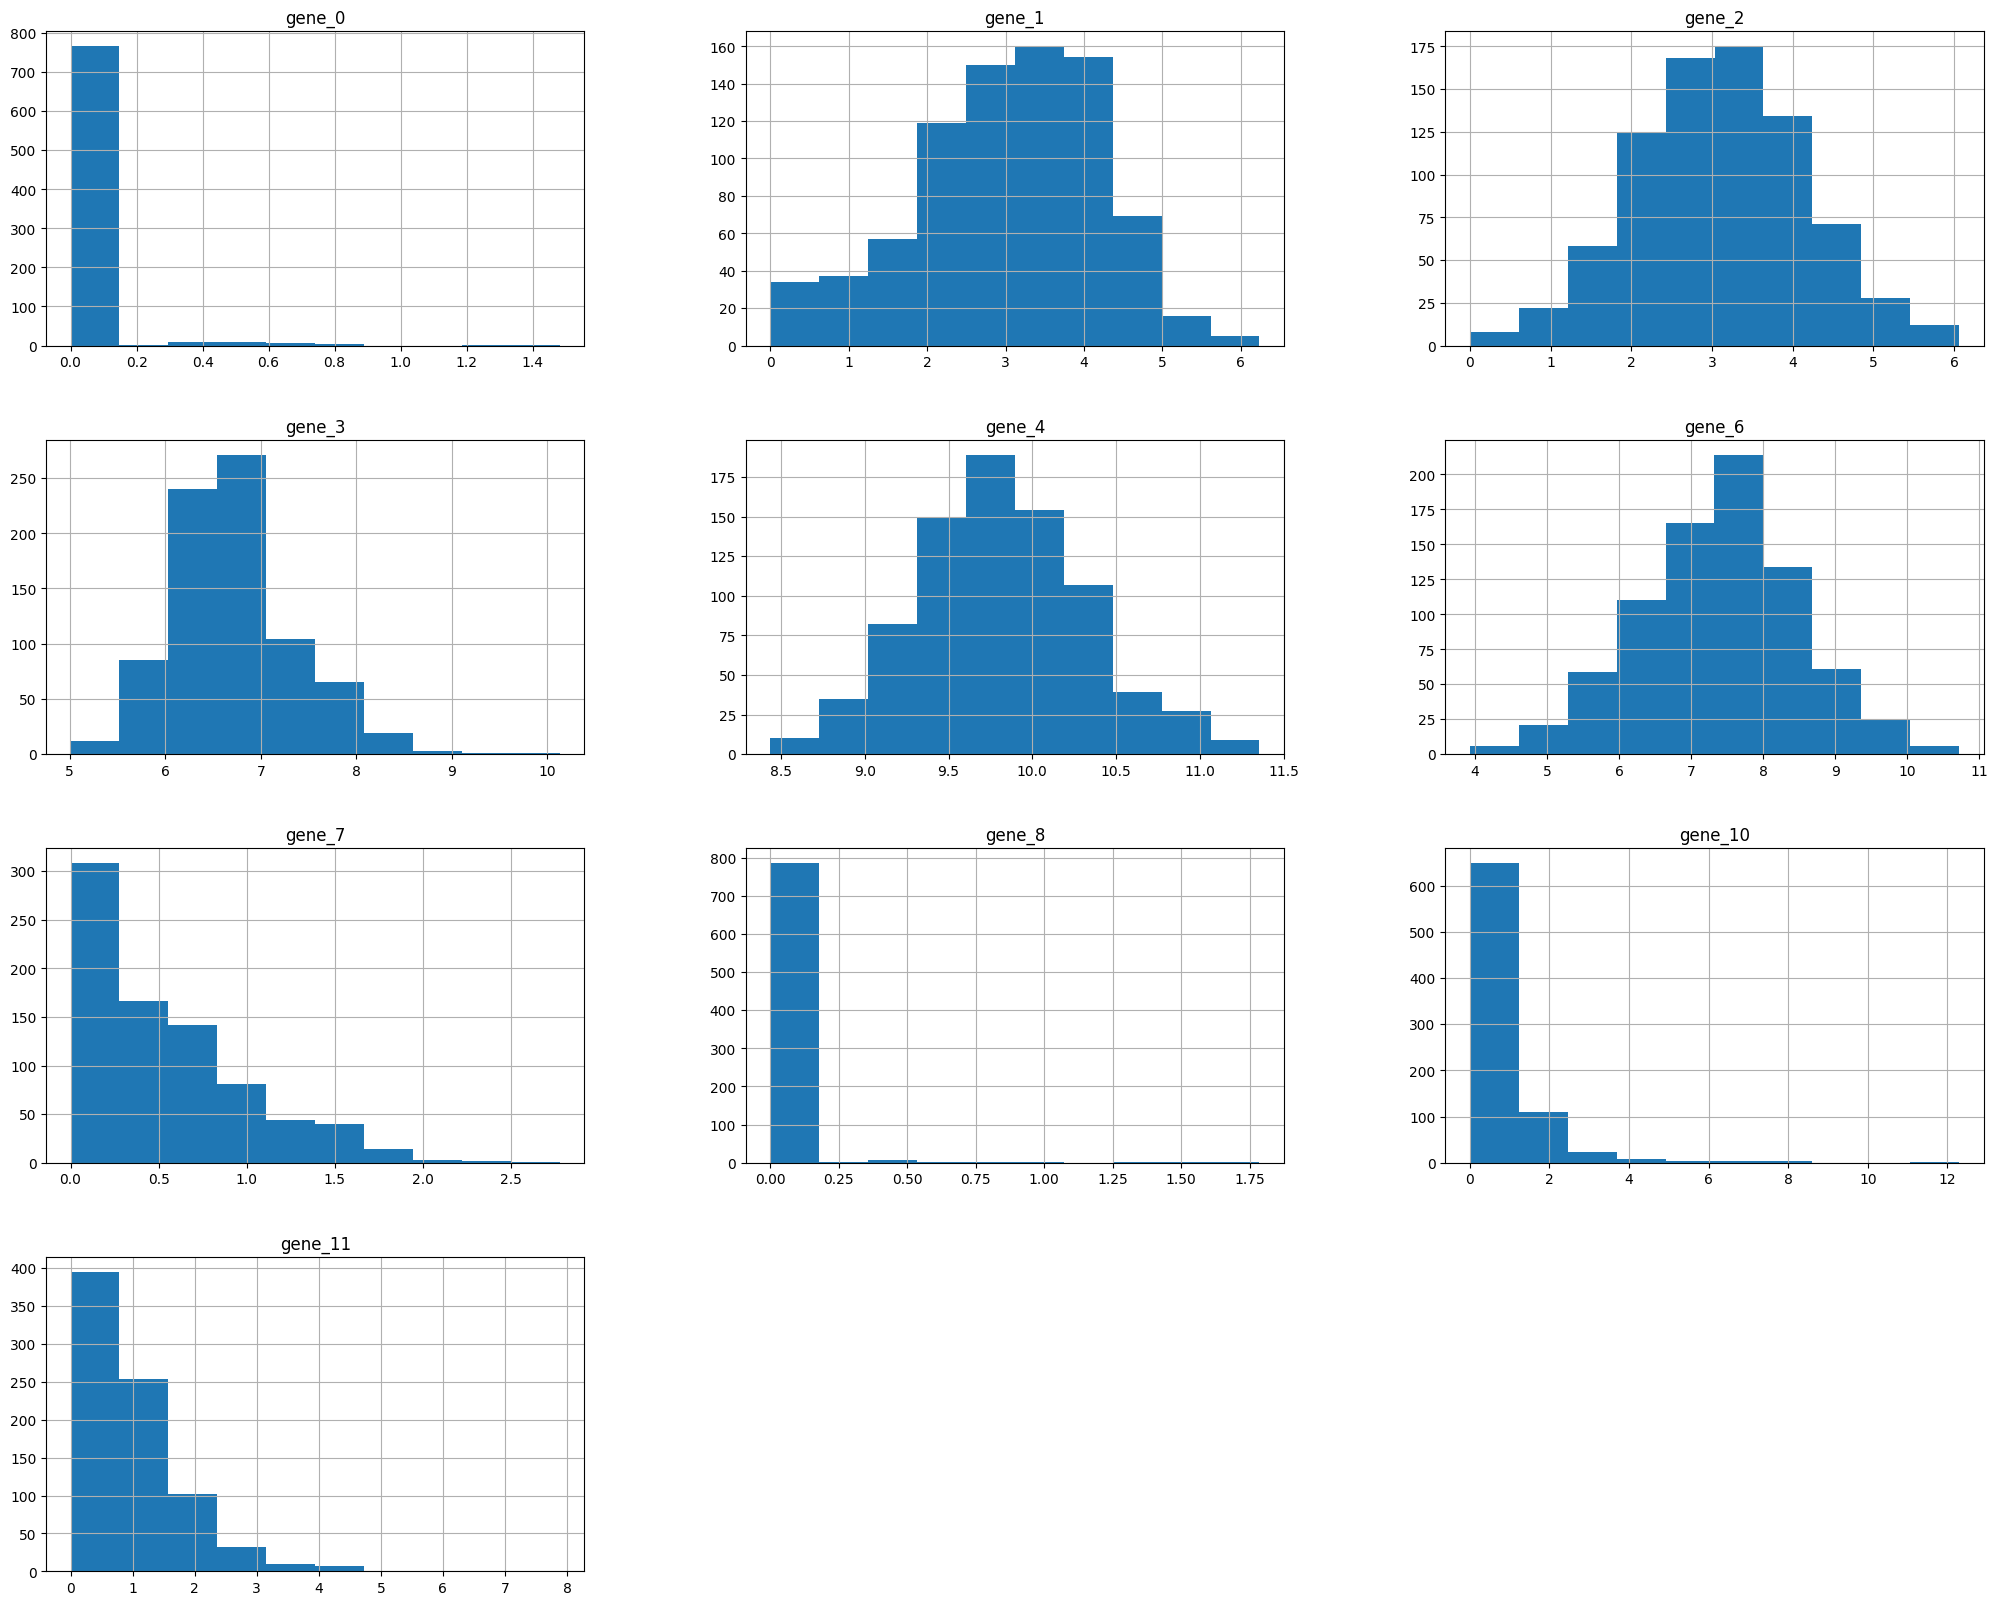

In [ ]:
selected_columns = df_gene.iloc[:, :10]

# selected_columns = df_gene.iloc[:, :-2]
selected_columns.hist(bins=10, linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(25,20)
plt.show()

### Splitting The Data into Training And Testing Dataset

In [ ]:
# retrieve numpy array
dataset = df_gene.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

# Normalisasi
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

###Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
k_best = 10  # Choose the number of top features to select

#### ANOVA F-test Features

In [ ]:
# Create SelectKBest object using chi2 as the score function
best_features_anova = SelectKBest(score_func=f_classif, k=k_best).fit(X_train, y_train)
selected_features_indices = best_features_anova.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_gene.columns[i] for i in selected_features_indices]

print(f"Number of selected features ANOVA: {len(selected_column_names)}")
print(f"Selected features ANOVA : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_gene[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [ ]:
X_train_selected_anova = best_features_anova.transform(X_train)
X_test_selected_anova = best_features_anova.transform(X_test)

In [ ]:
# Display the shape of the dataset before and after feature selection
print("Shape of original dataset:", X_train.shape)
print("Shape after feature selection:", X_train_selected_anova.shape)

Shape of original dataset: (640, 20088)
Shape after feature selection: (640, 10)


In [ ]:
df_gene.columns

Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_6', 'gene_7',
       'gene_8', 'gene_10', 'gene_11',
       ...
       'gene_20521', 'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525',
       'gene_20526', 'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530'],
      dtype='object', length=20089)

#### Univariate Selection

In [ ]:
# Create SelectKBest object using chi2 as the score function
best_features_univariate = SelectKBest(score_func=chi2, k=k_best).fit(X_train, y_train)
selected_features_indices = best_features_univariate.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_gene.columns[i] for i in selected_features_indices]

print(f"Number of selected features univariate: {len(selected_column_names)}")
print(f"Selected features univariate : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_gene[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

Number of selected features univariate: 10
Selected features univariate : ['gene_255', 'gene_7761', 'gene_8556', 'gene_9867', 'gene_9985', 'gene_10169', 'gene_13979', 'gene_18815', 'gene_19651', 'gene_20381']


In [ ]:
X_train_selected_univariate = best_features_univariate.transform(X_train)
X_test_selected_univariate = best_features_univariate.transform(X_test)

#### Recursive Feature Elimination

In [ ]:
# Inisialisasi model Regresi Logistik
# logreg_model = LogisticRegression()

# Inisialisasi RFE dengan model Regresi Logistik dan jumlah fitur yang ingin dipilih (misalnya, 10 fitur)
# best_features_rfe = RFE(estimator=logreg_model, n_features_to_select=k_best)

# # Fit RFE pada data latih
# best_features_rfe.fit(X_train, y_train)

# # best_features_rfe = RFE(estimator=ExtraTreesClassifier(n_estimators=20), n_features_to_select=k_best)
# # best_features_rfe.fit(X_train, y_train)
# selected_features_indices = best_features_rfe.get_support(indices=True)
# selected_features_rfe = [df_gene.columns[i] for i in selected_features_indices]

# print(f"Number of selected features RFE: {len(selected_features_rfe)}")
# print(f"Selected features RFE: {list(selected_features_rfe)}")

In [ ]:
# X_train_selected_rfe = best_features_rfe.transform(X_train)
# X_test_selected_rfe = best_features_rfe.transform(X_test)

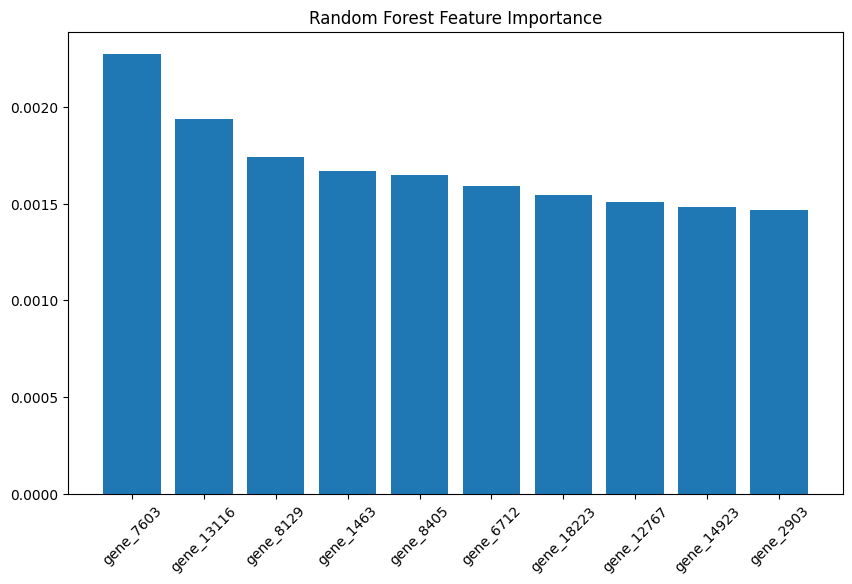

Selected Features: Index(['gene_7603', 'gene_13116', 'gene_8129', 'gene_1463', 'gene_8405',
       'gene_6712', 'gene_18223', 'gene_12767', 'gene_14923', 'gene_2903'],
      dtype='object')


In [ ]:
# Inisialisasi model Random Forest
random_forest_model = RandomForestClassifier(random_state=42)

# Fit model pada data
random_forest_model.fit(X_train, y_train)

# Dapatkan nilai kepentingan fitur
feature_importances = random_forest_model.feature_importances_

# Urutkan fitur berdasarkan kepentingan
sorted_indices = feature_importances.argsort()[::-1]

# Pilih sejumlah fitur yang ingin ditampilkan
num_features_to_display = 10
selected_features = df_gene.columns[sorted_indices[:num_features_to_display]]
selected_feature_indices = sorted_indices[:num_features_to_display]

# Tampilkan kepentingan fitur
plt.figure(figsize=(10, 6))
plt.bar(range(num_features_to_display), feature_importances[sorted_indices[:num_features_to_display]])
plt.xticks(range(num_features_to_display), selected_features, rotation=45)
plt.title('Random Forest Feature Importance')
plt.show()

# Tampilkan nama fitur yang terpilih
print("Selected Features:", selected_features)

In [ ]:
# X_train_selected_lasso = X_train[selected_feature_indices]
# X_test_selected_lasso = X_test[selected_feature_indices]

# Inisialisasi SelectFromModel dengan model Regresi Lasso
sfm = SelectFromModel(random_forest_model, threshold='median')  # Atur threshold sesuai kebutuhan

# Fit SelectFromModel pada data latih
sfm.fit(X_train, y_train)

# Transformasi data latih dan uji menggunakan fitur-fitur yang terpilih
X_train_selected_lasso = sfm.transform(X_train)
X_test_selected_lasso = sfm.transform(X_test)


# print("X_train_selected Features:", df_gene.columns.tolist())

Selected Feature Indices: [7558, 12966, 8077, 1458, 8353, 6671, 17804, 12618, 14757, 2894]


### Dimensionality Reduction

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Principal Component Analysis - PCA

In [ ]:
# Dimensionality Reduction with PCA for all feature
print("Dimensionality Reduction with PCA for all feature")
n_components = 5
pca = PCA(n_components=n_components)
X_train_reduced_pca = pca.fit_transform(X_train)
X_test_reduced_pca = pca.transform(X_test)

#### Linear Discriminant Analysis - LDA

In [ ]:
# Dimensionality Reduction with LDA for all feature
print("Dimensionality Reduction with LDA for all feature")
n_components = 1
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_reduced_lda = lda.fit_transform(X_train, y_train)
X_test_reduced_lda = lda.transform(X_test)

### Uji metode tersebut dengan sedikitnya 5 Klasifikasi

In [ ]:
# evaluation of a model using 4 features chosen with anova f-test
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # for checking the model accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import model_selection
# Define stratified k-fold cross-validation with 10 splits
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
scoring = 'accuracy'

####Logistic Regresion

In [ ]:
# fit the model with all feature
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_lasso, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_lasso)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

In [ ]:
# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 500, 1000]  # Maximum number of iterations for optimization
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_fs, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_fs)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection ANOVA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection Univariate:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_lasso, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_lasso)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection RFE:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction PCA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction LDA:", accuracy)

####Decision Tree

In [ ]:
# fit the model with all feature
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

In [ ]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 10, 50, 100],
    'min_samples_leaf': [1, 5, 10, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_fs, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_fs)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection ANOVA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection Univariate:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection RFE:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature reduction PCA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature reduction LDA:", accuracy)

####Support Vector Machine

In [ ]:
# fit the model with all feature
model = SVC()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

In [ ]:
# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3],
    'gamma': [0.1, 1, 'auto'],
    'class_weight': [None, 'balanced']
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_fs, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_fs)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection ANOVA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection Univariate:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection RFE:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction PCA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction LDA:", accuracy)

####K-Nearest Neighbors

In [ ]:
# fit the model with all feature
model = KNeighborsClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

In [ ]:
# Define hyperparameter grid for KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [10, 20, 30, 40]
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_fs, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_fs)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection ANOVA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection Univariate:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection RFE:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction PCA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction LDA:", accuracy)

####Random Forest

In [ ]:
# fit the model with all feature
model = RandomForestClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

In [ ]:
# Define hyperparameter grid for KNeighborsClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_fs, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_fs)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection ANOVA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection Univariate:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection RFE:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature reduction PCA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature reduction LDA:", accuracy)